In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

ind = erk.get_ind_returns()
er = erk.annualized_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from scipy.optimize import minimize
def msr(riskfree_rate, er, cov):
    '''
    Returns the Portfolio with the Maximum Sharpe Ratio
    Using the Risk Free Rate, covariance matrix and the returns.
    '''
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n

    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        '''
        Returns the negative of the Sharpe Ratio of a portfolio, given weights
        '''
        r = erk.portfolio_return(weights,er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate) / vol

    results = minimize(neg_sharpe_ratio, init_guess, args = (riskfree_rate, er, cov,), method = 'SLSQP', constraints = (weights_sum_to_1),bounds = bounds
    )
    return results.x

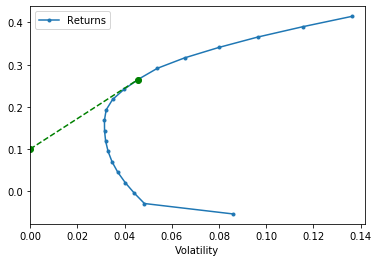

In [13]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left = 0)
rf = 0.1
# weights
w_msr = msr(rf, er, cov)
# returns and volatilities
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

# Add Capital Market Line
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color = 'green', marker = 'o', linestyle = 'dashed')


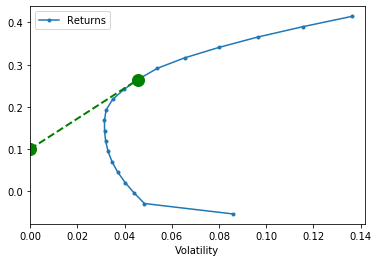

In [16]:
erk.plot_ef(20, er, cov, show_cml = True, riskfree_rate = 0.1,  )